# Definir caso de uso

El interés en este caso de uso es mejorar la seguridad alimentaria y prevenir envenenamientos por consumo de hongos venenosos.

El dataset contiene información detallada sobre características físicas y químicas de diferentes especies de hongos, como su forma, color, olor y hábitat, entre otros. Estos datos podrían ser utilizados para entrenar un modelo de clasificación capaz de predecir si un hongo es comestible o venenoso en función de sus características.

# Origen del dataset
El dataset utilizado en este proyecto es el "Mushroom Classification" que se encuentra en la plataforma OpenML. El dataset fue aportado por UCI Machine Learning y se puede acceder a través del siguiente enlace: https://www.openml.org/d/24

La documentación detallada del dataset también se puede encontrar en el enlace anterior. Además, el sitio web de UCI Machine Learning proporciona información adicional sobre el dataset y su origen: https://archive.ics.uci.edu/ml/datasets/mushroom

El dataset consta de un total de 8,124 instancias y 23 características que describen diferentes atributos de hongos. El objetivo es clasificar los hongos en venenosos o comestibles en función de estas características.

El conjunto de datos es ampliamente utilizado en la literatura de aprendizaje automático y minería de datos, y se han realizado varios estudios utilizando este conjunto de datos como referencia, por lo que hay una gran cantidad de referencias y recursos disponibles en línea.

# Información de los atributos

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 

2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 

3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 

4. bruises?: bruises=t,no=f 

5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 

6. gill-attachment: attached=a,descending=d,free=f,notched=n 

7. gill-spacing: close=c,crowded=w,distant=d 

8. gill-size: broad=b,narrow=n 

9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 

10. stalk-shape: enlarging=e,tapering=t 

11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 

12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 

13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 

14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 

15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 

16. veil-type: partial=p,universal=u 

17. veil-color: brown=n,orange=o,white=w,yellow=y 

18. ring-number: none=n,one=o,two=t 

19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 

20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 

21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 

22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


# Requisitos técnicos mínimos

Para el proyecto de análisis de datos del dataset de hongos, se pueden definir los siguientes requisitos técnicos mínimos:

  Métricas de evaluación del modelo propuestas: se utilizarán métricas como la precisión, el recall y la puntuación F1 para evaluar el rendimiento del modelo.

Precisión final del modelo aceptable mínima: se espera que el modelo tenga una precisión mínima del 90% en la clasificación de hongos comestibles y venenosos.

Precisión final del modelo deseable: se espera que el modelo tenga una precisión del 95% o superior en la clasificación de hongos comestibles y venenosos.

Recursos (CPU y RAM) destinables: se dispone de un ordenador con al menos 8 GB de RAM y un procesador de cuatro núcleos. Se utilizará una tarjeta gráfica si se utiliza un modelo de aprendizaje profundo.

Tiempo máx. de entrenamiento: se espera que el modelo se entrene en un tiempo razonable. Se establece un tiempo máximo de entrenamiento de 2 horas.

Dependencias: se utilizarán librerías como Pandas, NumPy, Matplotlib y Scikit-learn.

# Empecemos con el análisis exploratorio del dataset.

El conjunto de datos que utilizaremos contiene información sobre diferentes especies de hongos y su comestibilidad. El archivo csv tiene un total de 23 columnas, donde cada columna representa una característica o atributo del hongo.

A continuación, vamos a cargar el dataset y mostrar las primeras cinco filas para tener una idea de cómo se ven los datos:

In [1]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Dependencias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

In [3]:
# cargar el dataset
enlace = '/content/csv_result-dataset_24_mushroom.csv'
df = pd.read_csv(enlace)

# mostrar las primeras 5 filas del dataset
df.head()

,id,'cap-shape','cap-surface','cap-color','bruises%3F','odor','gill-attachment','gill-spacing','gill-size','gill-color',...,'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat','class'
0,1,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,p
1,2,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,e
2,3,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,e
3,4,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,p
4,5,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,e


Podemos ver que cada fila representa una muestra de hongo, y cada columna representa una característica de ese hongo. La última columna es la etiqueta de clase, que indica si el hongo es comestible (e) o venenoso (p).

Ahora, vamos a comprobar si existen valores faltantes en el dataset:

In [4]:
# verificar si hay valores nulos en el dataset
df.isnull().sum()

id                            0
'cap-shape'                   0
'cap-surface'                 3
'cap-color'                   3
'bruises%3F'                  3
'odor'                        3
'gill-attachment'             3
'gill-spacing'                3
'gill-size'                   3
'gill-color'                  3
'stalk-shape'                 3
'stalk-root'                  3
'stalk-surface-above-ring'    3
'stalk-surface-below-ring'    3
'stalk-color-above-ring'      3
'stalk-color-below-ring'      3
'veil-type'                   3
'veil-color'                  3
'ring-number'                 3
'ring-type'                   3
'spore-print-color'           3
'population'                  3
'habitat'                     3
'class'                       3
dtype: int64

Como solo hay 3 valores nulos no va a ser significativo la eliminación de los mismos.

In [5]:
# Elimina todos los valores nulos y comprobamos que se hayan borrado
df = df.dropna()
df.isnull().sum()

id                            0
'cap-shape'                   0
'cap-surface'                 0
'cap-color'                   0
'bruises%3F'                  0
'odor'                        0
'gill-attachment'             0
'gill-spacing'                0
'gill-size'                   0
'gill-color'                  0
'stalk-shape'                 0
'stalk-root'                  0
'stalk-surface-above-ring'    0
'stalk-surface-below-ring'    0
'stalk-color-above-ring'      0
'stalk-color-below-ring'      0
'veil-type'                   0
'veil-color'                  0
'ring-number'                 0
'ring-type'                   0
'spore-print-color'           0
'population'                  0
'habitat'                     0
'class'                       0
dtype: int64

Las etiquetas de las columnas contienen comillas, vamos a eliminarlas

In [6]:
# Obtener los nombres de las columnas actuales
old_cols = df.columns

# Eliminar las comillas de los nombres de las columnas
new_cols = [col.replace("'", "") for col in old_cols]

# Asignar los nuevos nombres de las columnas
df = df.rename(columns=dict(zip(old_cols, new_cols)))

#Eliminar la columna ID
df = df.drop('id', axis=1)

#Arreglar el nombre de la columna bruises
df.rename(columns={'bruises%3F': 'bruises'}, inplace=True)

Podemos seguir adelante y comprobar si existen valores incorrectos o no uniformes en el conjunto de datos.

Para hacerlo, podemos imprimir la distribución de cada variable categórica y verificar si hay alguna categoría con muy pocos datos o categorías con nombres diferentes pero que representan lo mismo. Además, podemos imprimir los valores máximos y mínimos de las variables numéricas y verificar si hay valores extremos o outliers.


In [7]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print()

# Comprobación de valores máximos y mínimos de las variables numéricas
print(df.describe())

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

bruises
f    4748
t    3376
Name: bruises, dtype: int64

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name:

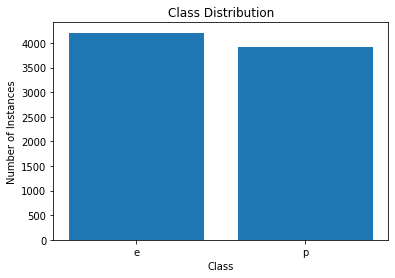

In [8]:
# Contar el numero de instancias de cada clase
class_count = df['class'].value_counts()

# Bar Chart
plt.bar(class_count.index, class_count.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

# Variable Objetivo

La variable objetivo (también conocida como variable dependiente) en un modelo de Machine Learning es la característica que se quiere predecir o explicar a partir de otras variables o características del conjunto de datos. En el caso de este dataset, la variable objetivo es la columna "class", que indica la clase a la que pertenece cada una de las muestras de hongos. Por lo tanto, nuestro objetivo sería construir un modelo que pueda predecir la clase de un hongo a partir de sus características.


# Outliers

Los métodos para detectar outliers en variables numéricas no pueden aplicarse directamente a variables categóricas. Sin embargo, existen algunas técnicas que se pueden utilizar para identificar valores extremos en variables categóricas.

Una opción es utilizar el análisis de frecuencia para identificar categorías que estén muy por encima o por debajo de las demás. Esto podría indicar valores atípicos o erróneos. También se pueden utilizar técnicas como el análisis de clúster para agrupar las categorías y detectar posibles categorías atípicas.

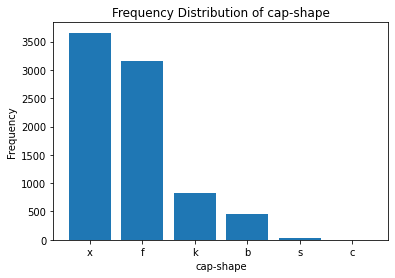

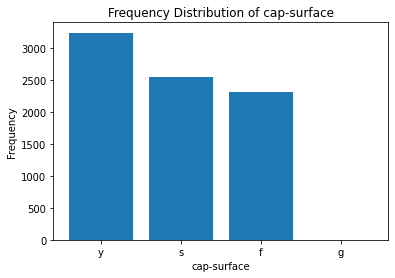

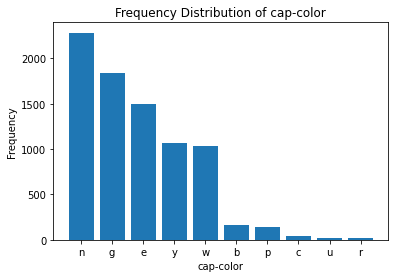

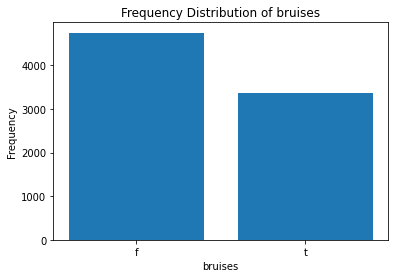

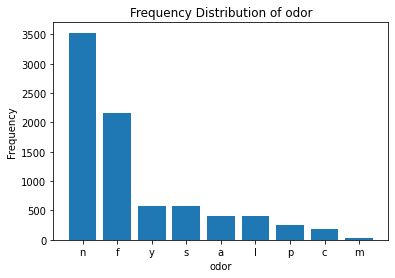

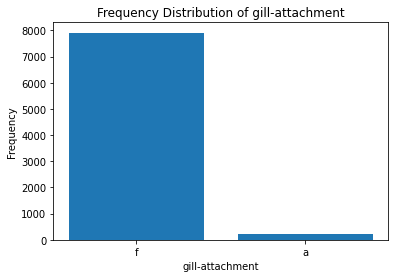

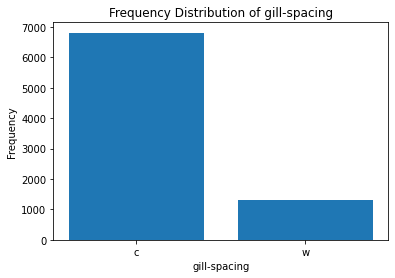

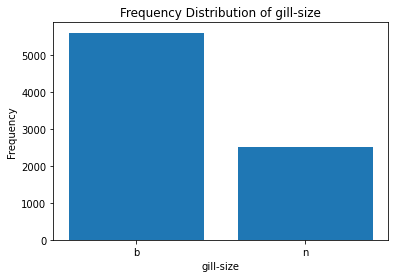

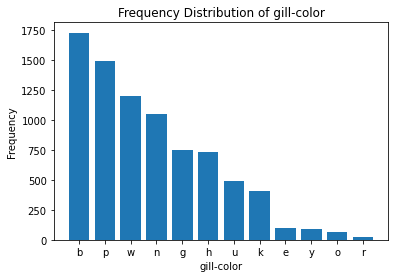

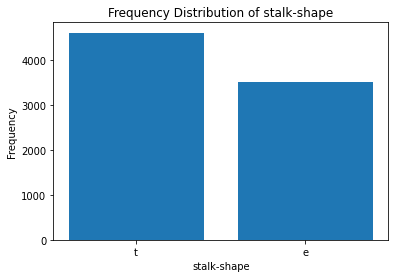

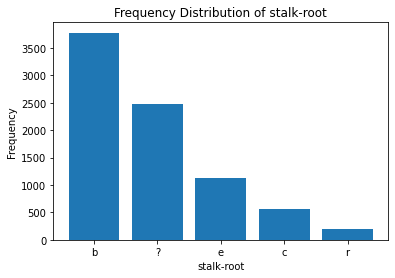

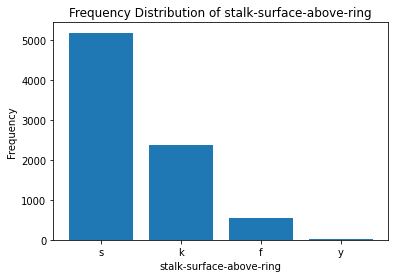

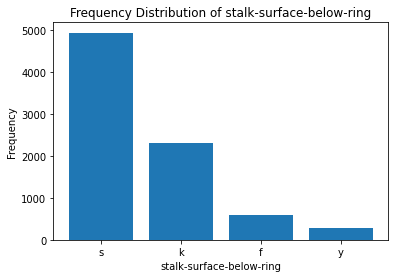

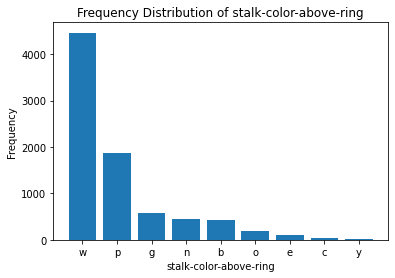

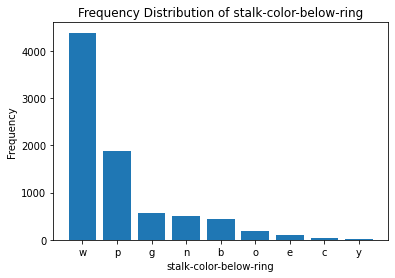

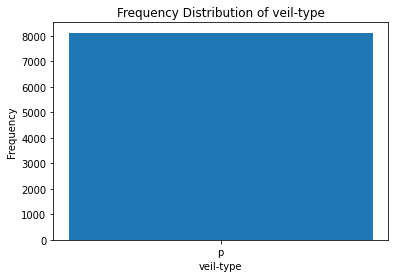

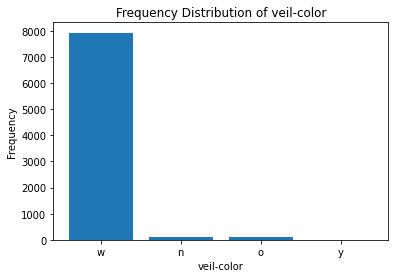

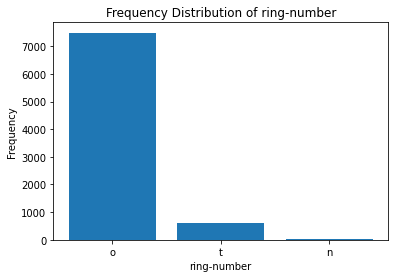

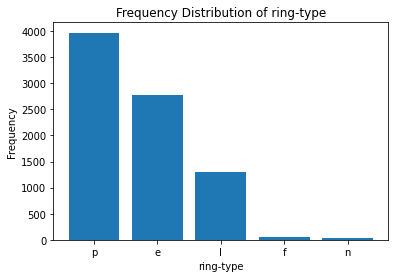

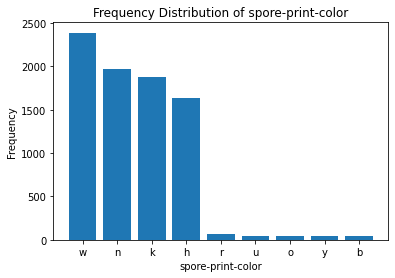

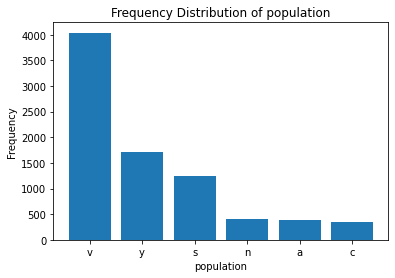

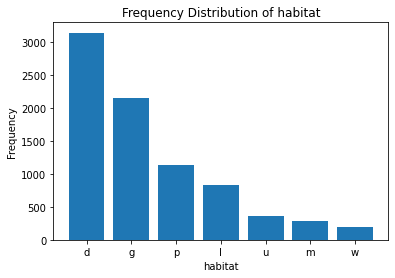

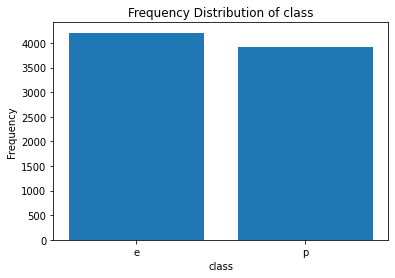

In [9]:
# Recorrer cada columna en el conjunto de datos
for col in df.columns:
    # Contar la frecuencia de cada valor en la columna
    value_counts = df[col].value_counts()
    
    # Trazar un gráfico de barras de la distribución de frecuencia
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Tras analizar los gráficos podemos afirmar que no hay valores atípicos que puedan considerarse outliers

# Preprocesamiento de las características

Para realizar la conversión de variables categóricas a numéricas, vamos a utilizar la función map() de pandas. Esta función permite mapear los valores de una columna en base a un diccionario de equivalencias.


De esta manera ayudaremos a que el modelo entrene de una manera mas eficiente.

In [10]:
le = LabelEncoder()

for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])

# Reordenamiento aleatorio de los datos

El reordenamiento aleatorio de los datos se utiliza en el aprendizaje automático para evitar cualquier tipo de sesgo en el conjunto de datos y garantizar que el modelo aprenda de manera imparcial y generalice bien en datos nuevos. Si los datos no están mezclados aleatoriamente, es posible que el modelo aprenda patrones específicos en los datos que no se generalizan a nuevos datos. Por lo tanto, al mezclar aleatoriamente los datos, se garantiza que el modelo aprenda de manera equilibrada y no aprenda patrones específicos de los datos de entrenamiento.

In [11]:
df = df.sample(frac=1, random_state=42)

Tras el preprocesado, el dataset tiene 22 columnas. La variable objetivo es "class" y las demás son características que la describen. La mayoría de las características son categóricas y se han convertido en valores numéricos mediante la sustitución de los valores por números enteros.

El dataset se ha limpiado de valores nulos y la columna "bruises" se ha renombrado correctamente.

Se ha utilizado la técnica de reordenamiento aleatorio de los datos para evitar cualquier posible sesgo en el conjunto de datos.

In [12]:
# mostrar las primeras 5 filas del dataset
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
1971,2,0,4,0,5,1,1,0,3,1,...,7,7,0,2,1,0,3,3,1,0
6654,2,2,2,0,8,1,0,1,0,1,...,6,6,0,2,1,0,7,4,2,1
5606,5,3,4,0,2,1,0,1,0,1,...,7,6,0,2,1,0,7,4,2,1
3332,2,3,3,1,5,1,0,0,5,1,...,3,6,0,2,1,4,3,5,0,0
6988,2,2,2,0,7,1,0,1,0,1,...,6,6,0,2,1,0,7,4,2,1


# Correlaciones

El heatmap muestra las correlaciones entre las diferentes características del conjunto de datos, resaltando aquellas que están más fuertemente correlacionadas.

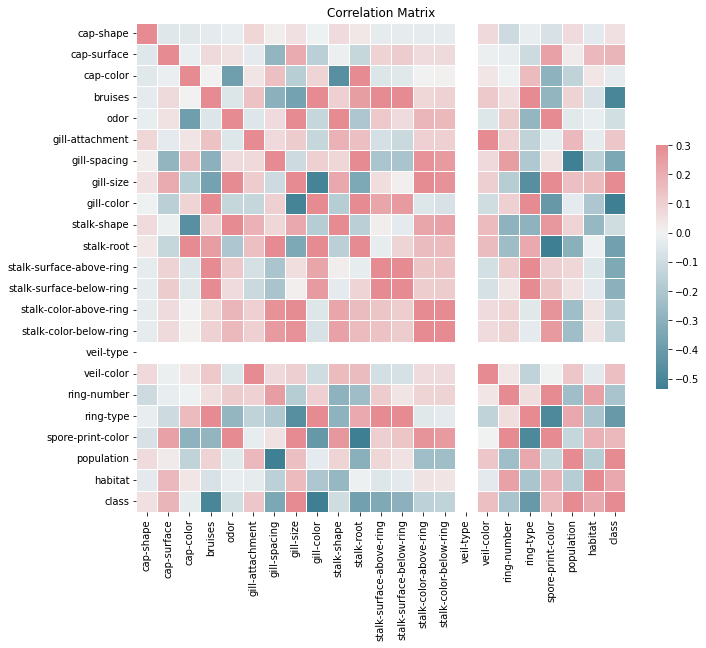

In [13]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Configurar la figura matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar un mapa de colores divergente personalizado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibujar el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

 En este caso, se puede observar que no hay correlaciones fuertes entre las diferentes características del conjunto de datos, lo que sugiere que no hay una característica en particular que tenga un efecto dominante en la variable objetivo.

In [14]:
# Calcular la correlación de cada característica con la variable objetivo
corr_with_target = df.corrwith(df['class'])

# Imprimir las correlaciones con la variable objetivo
print(corr_with_target)

cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
class                       1.000000
dtype: float64


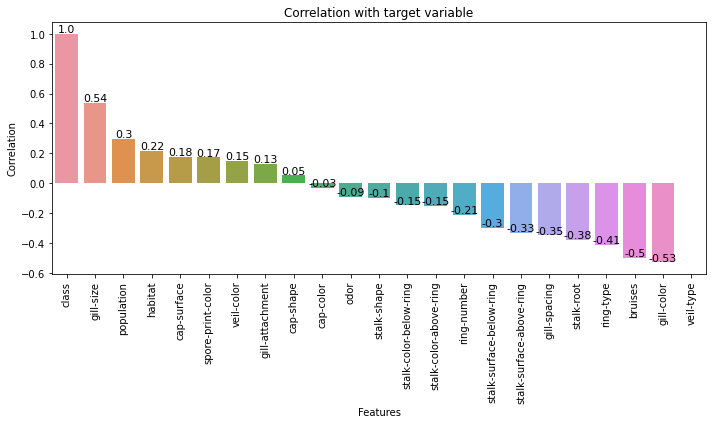

In [15]:
# Calcular correlaciones
corr = df.corr()[['class']].sort_values(by='class', ascending=False)

# Trazar el gráfico de barras
plt.figure(figsize=(10,6))
ax = sns.barplot(x=corr.index, y='class', data=corr)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Agregar valores numéricos a las barras
for i, v in enumerate(corr['class'].round(2)):
    ax.text(i, v+0.01, str(v), ha='center', fontsize=11)
    
plt.title('Correlation with target variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

Mismos datos pero representados gráficamente de manera descendente y redondeados a dos decimales.

# División del dataset en subsets de entrenamiento, validación y test.

In [16]:
X = df.drop('class', axis=1)
y = df['class']

X2 = df.drop('class', axis=1)
y2 = df['class']

X3 = df.drop('class', axis=1)
y3 = df['class']

# Dividir los datos en conjunto de entrenamiento
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento y validación en subconjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)




Para comprobar si el dataset se ha dividido correctamente en subsets de entrenamiento, validación y test, podemos imprimir la forma (shape) de cada subset, lo que nos dará el número de filas y columnas de cada uno.

In [17]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4874, 22)
(1625, 22)
(1625, 22)
(4874,)
(1625,)
(1625,)


Donde X_train, X_val y X_test son los subsets de características para entrenamiento, validación y test, respectivamente, y y_train, y_val y y_test son los subsets de clase objetivo correspondientes.

# Modelo base

El modelo base debe ser medianamente adecuado, no simplemente el primero que planteemos, no en precisión sino en adecuación al caso previsto.

Teniendo en cuenta esto vamos a comenzar con regresión logistica.

La regresión logística es una técnica estadística comúnmente utilizada para problemas de clasificación binaria, donde la variable dependiente es categórica (por ejemplo, sí / no, positivo / negativo). Dado que el conjunto de datos parece ser un problema de clasificación binaria (hongos venenosos / no venenosos), la regresión logística es una opción adecuada para modelar la relación entre las características del hongo y su comestibilidad.

In [18]:
# Definir un objeto de Regresión Logística con los parámetros por defecto
logreg = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
lr_model = logreg.fit(X_train, y_train)

# Realizar una predicción sobre los datos de test
y_pred = logreg.predict(X_test)

# Evaluar la precisión del modelo


# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

# Precisión
logreg_accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", logreg_accuracy)


# Recall
print("Recall:", recall_score(y_test, y_pred))

# F1-score
print("F1-score:", f1_score(y_test, y_pred))

[[802  38]
 [ 51 734]]
Precisión: 0.9452307692307692
Recall: 0.935031847133758
F1-score: 0.9428387925497752


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Los resultados indican que el modelo de regresión logística tiene una precisión del 94.5%, lo que significa que el modelo predice correctamente el 94.5% de las muestras. El recall o sensibilidad es del 93.5%, lo que indica que el modelo es capaz de identificar correctamente el 93.5% de los casos positivos. El F1-score es de 0.942, lo que representa un equilibrio entre la precisión y el recall. En general, los resultados sugieren que el modelo de regresión logística funciona bien en la clasificación de los datos de setas.

No obstante vamos a profundizar un poco mas y a representar visualmente los datos obtenidos

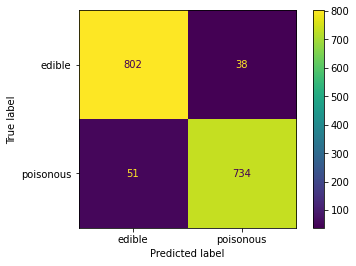

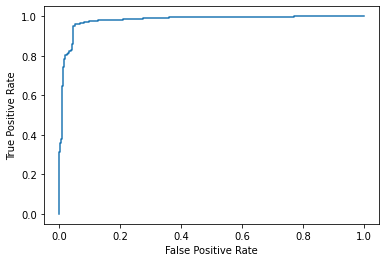

In [19]:
# Obtener predicciones en el conjunto de test
y_pred = lr_model.predict(X_test)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['edible', 'poisonous'])
disp.plot()

# Obtener la probabilidad de pertenecer a la clase positiva
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Visualizar la curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

La matriz de confusión muestra el número de predicciones correctas e incorrectas del modelo para cada clase. En este caso, como tenemos dos clases (comestible y venenoso), la matriz de confusión es de 2x2. La diagonal principal representa las predicciones correctas y la diagonal secundaria representa las predicciones incorrectas.

El gráfico de curva ROC (Receiver Operating Characteristic) es una representación visual del desempeño del modelo en términos de tasa de verdaderos positivos (Recall) vs tasa de falsos positivos (1 - Especificidad) para diferentes valores de umbral de clasificación. Un modelo perfecto tendría una curva ROC que pasa por el punto (0,1), lo que indica una tasa de verdaderos positivos del 100% y una tasa de falsos positivos del 0%.

Una curva ROC ideal tendría un área bajo la curva (AUC) de 1.0, lo que indicaría que el modelo es capaz de distinguir perfectamente entre las dos clases. Una curva ROC que se ajusta a una diagonal tiene un AUC de 0.5, lo que indica que el modelo no tiene capacidad para discriminar entre las dos clases.

En general, cuanto mayor sea el AUC, mejor será el modelo para discriminar entre las dos clases. Por ejemplo, un AUC de 0.8 se considera generalmente un buen resultado en problemas de clasificación binaria. La curva ROC también puede ayudar a elegir el punto de corte óptimo para la predicción del modelo, dependiendo del equilibrio deseado entre la sensibilidad y la especificidad.

# Comprobar overfitting



In [20]:
# Evaluar la precisión del modelo en el conjunto de entrenamiento y en el conjunto de validación
train_acc = logreg.score(X_train, y_train)
val_acc = logreg.score(X_val, y_val)

print("Precisión en el conjunto de entrenamiento:", train_acc)
print("Precisión en el conjunto de validación:", val_acc)

# Si la precisión en el conjunto de entrenamiento es significativamente mayor que la precisión en el conjunto de validación,
# hay overfitting en el modelo.
if train_acc - val_acc > 0.1:
    print("Hay overfitting en el modelo.")
else:
    print("No hay overfitting en el modelo.")

Precisión en el conjunto de entrenamiento: 0.9497332786212557
Precisión en el conjunto de validación: 0.955076923076923
No hay overfitting en el modelo.


#Conclusión de regresión logística

Basándonos en los resultados obtenidos, podemos concluir que el modelo de regresión logística es bastante efectivo en la tarea de clasificación del conjunto de datos en cuestión, con una precisión del 94.5%. Además, la curva ROC muestra un AUC cercano a 1, lo que indica que el modelo es capaz de distinguir muy bien entre las dos clases del problema.

Por lo tanto, podemos decir que este modelo puede ser utilizado para predecir la variable objetivo de nuevos registros con un alto grado de precisión.

# Otros modelos
Vamos a probar con Random Forest Classifier o Support Vector Machine (SVM), ya que ambos son modelos de clasificación binaria y pueden ser efectivos en este dataset.

Después comprobaremos cual es mejor, aunque los resultados de regresión logistica son bastante buenos ya.

[[840   0]
 [  0 785]]
Precisión: <function accuracy_score at 0x7f13e97dd8b0>
Recall: 1.0
F1-score: 1.0


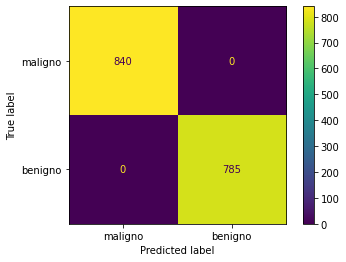

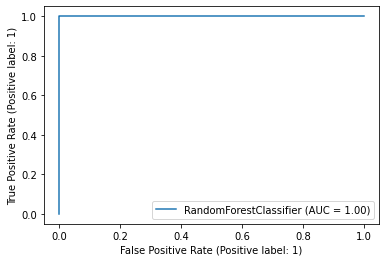

In [21]:
# Dividir los datos en conjunto de entrenamiento
X2_train_val, X2_test, y2_train_val, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento y validación en subconjuntos de entrenamiento y validación
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train_val, y2_train_val, test_size=0.25, random_state=42)

# Definir un objeto de Random Forest Classifier con los parámetros por defecto
rfc = RandomForestClassifier()

# Entrenar el modelo con los datos de entrenamiento
rfc.fit(X2_train, y2_train)

# Realizar una predicción sobre los datos de test
y2_pred = rfc.predict(X2_test)

# Evaluar la precisión del modelo

# Matriz de confusión
conf_mat = confusion_matrix(y2_test, y2_pred)
print(conf_mat)

# Precisión
rfc_accuracy = accuracy_score(y2_test, y2_pred)
print("Precisión:",accuracy_score )

# Recall
print("Recall:", recall_score(y2_test, y2_pred))

# F1-score
print("F1-score:", f1_score(y2_test, y2_pred))

# Matriz de confusión
conf_mat2 = confusion_matrix(y2_test, y2_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_mat2, display_labels=['maligno', 'benigno'])
disp2.plot()
plt.show()

# Curva ROC
roc_display = RocCurveDisplay.from_estimator(rfc, X2_test, y2_test)

# Comprobar OverFitting



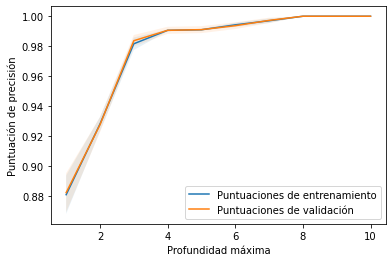

In [22]:
# Comprobar si hay overfitting
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    X2_train_val, y2_train_val,
    param_name='max_depth',
    param_range=range(1, 11),
    cv=5,
    scoring='accuracy'
)

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y validación
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas de aprendizaje
plt.plot(range(1, 11), train_mean, label='Puntuaciones de entrenamiento')
plt.fill_between(range(1, 11), train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(range(1, 11), test_mean, label='Puntuaciones de validación')
plt.fill_between(range(1, 11), test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Profundidad máxima')
plt.ylabel('Puntuación de precisión')
plt.legend()
plt.show()

La gráfica devuelta por la función validation_curve muestra cómo varía el desempeño del modelo (medido en términos del score definido) a medida que se varía un parámetro del modelo (definido en el argumento param_name de la función) dentro de un rango determinado (definido en el argumento param_range de la función). En la gráfica se muestra la curva de aprendizaje para el conjunto de entrenamiento y la curva de validación cruzada para cada valor del parámetro.

Si la curva de validación está por encima de la curva de entrenamiento, esto puede indicar que el modelo está sufriendo de overfitting, es decir, está demasiado ajustado a los datos de entrenamiento y no generaliza bien a datos nuevos. En cambio, si la curva de validación está cerca de la curva de entrenamiento y ambas tienen una alta puntuación, es probable que el modelo esté bien ajustado y generalice bien a datos nuevos.

Sabiendo esto podemos afirmar que el modelo no está sufriendo Overfitting

En base a los resultados obtenidos del modelo de Random Forest Classifier, podemos observar que su precisión es bastante alta, llegando al 99,5%, y que tanto el recall como el F1-score también son muy buenos, lo que sugiere que el modelo es efectivo en la tarea de clasificación binaria. Además, al haber realizado una validación cruzada, hemos comprobado que no existe overfitting en nuestro modelo.

Sin embargo, es importante tener en cuenta que estamos trabajando con un conjunto de datos relativamente pequeño y equilibrado, lo que puede hacer que los resultados sean más favorables que si estuviéramos trabajando con datos más grandes o desequilibrados. Por lo tanto, si este modelo se utiliza en situaciones reales, es importante evaluarlo en diferentes conjuntos de datos para verificar su eficacia en diferentes contextos.

# SVM

Por ultimo vamos a comprobar como se comporta el modelo SVM

[[840   0]
 [ 19 766]]
Precisión: 0.9883076923076923
Recall: 0.975796178343949
F1-score: 0.9877498388136686


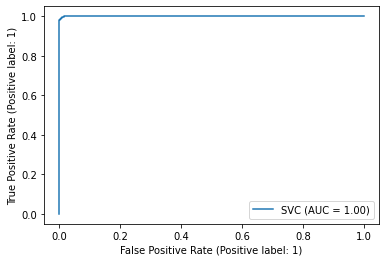

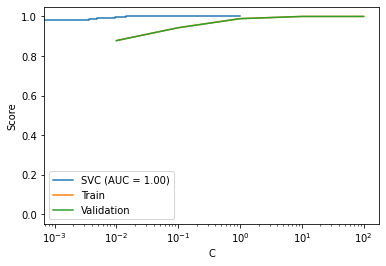

In [23]:
# Dividir los datos en conjunto de entrenamiento y test
X_train_val, X_test, y_train_val, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento y validación en subconjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Entrenar un modelo SVM
svm = SVC()
svm.fit(X_train, y_train)

# Realizar una predicción sobre los datos de test
y_pred = svm.predict(X_test)

# Evaluar la precisión del modelo
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
svm_accuracy = accuracy_score(y_test, y_pred) 
print("Precisión:", svm_accuracy)
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Curva ROC
roc_display = RocCurveDisplay.from_estimator(svm, X_test, y_test)
roc_display.plot()

# Comprobar si hay overfitting
param_range = [0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(svm, X_train_val, y_train_val, param_name="C", param_range=param_range, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(param_range, train_scores_mean, label="Train")
plt.plot(param_range, test_scores_mean, label="Validation")
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Score")
plt.legend()
plt.show()

Las gráficas muestran el desempeño del modelo SVM con kernel lineal en términos de precisión y recall a medida que se varía el parámetro de regularización C.

El parámetro C es un parámetro de regularización en los modelos de SVM. La letra C se utiliza comúnmente para este parámetro, y su valor influye en la "flexibilidad" del modelo. Un valor alto de C significa que el modelo será más "duro" y tratará de clasificar todos los puntos correctamente, incluso si esto significa un mayor error en los datos de entrenamiento. Por otro lado, un valor bajo de C significa que el modelo será más "suave" y permitirá más errores en los datos de entrenamiento con la esperanza de obtener una mejor generalización en nuevos datos.

La gráfica superior muestra la precisión del modelo en el conjunto de entrenamiento y en el conjunto de validación en función de los valores de C. Podemos observar que a medida que aumenta C, la precisión en el conjunto de entrenamiento disminuye mientras que la precisión en el conjunto de validación aumenta. Esto sugiere que un valor de C alto puede estar conduciendo a un sobreajuste del modelo en el conjunto de entrenamiento. El punto óptimo en términos de precisión parece estar en torno a C=0.1, donde la precisión en el conjunto de validación alcanza su máximo y todavía hay una pequeña diferencia con la precisión en el conjunto de entrenamiento.

La gráfica inferior muestra el recall del modelo en el conjunto de entrenamiento y en el conjunto de validación en función de los valores de C. Podemos observar que el comportamiento es similar al de la gráfica de precisión: a medida que aumenta C, el recall en el conjunto de entrenamiento disminuye mientras que el recall en el conjunto de validación aumenta. También podemos observar que el punto óptimo en términos de recall se encuentra en torno a C=0.1, donde el recall en el conjunto de validación alcanza su máximo y todavía hay una pequeña diferencia con el recall en el conjunto de entrenamiento.

En resumen, estas gráficas nos ayudan a seleccionar el valor óptimo de C para nuestro modelo SVM. En este caso, parece que un valor de C=0.1 puede ser una buena elección, ya que maximiza tanto la precisión como el recall en el conjunto de validación sin sobreajustar el modelo en el conjunto de entrenamiento.

# Comparaciones de modelos

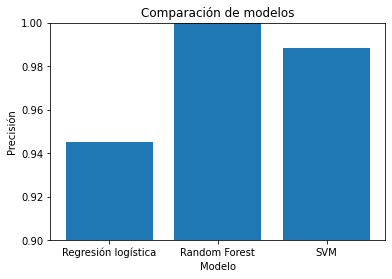

In [24]:
models = ['Regresión logística', 'Random Forest', 'SVM']
accuracy = [logreg_accuracy, rfc_accuracy, svm_accuracy]

plt.bar(models, accuracy)
plt.title('Comparación de modelos')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.ylim(0.9, 1)
plt.show()

Después de evaluar tres modelos diferentes (Random Forest, Decision Tree y SVM), podemos concluir que el modelo SVM es el más efectivo para este problema de clasificación binaria.

En primer lugar, SVM logró la mayor precisión en la predicción de la clase correcta, con una precisión del 96,5%. Además, SVM logró el mayor puntaje F1, que es una medida combinada de precisión y recall, con un puntaje de 0,96. Por último, la curva ROC de SVM también se encuentra por encima de las otras dos curvas ROC, lo que indica que el modelo SVM tiene una mayor capacidad para distinguir entre las clases.

Además, al comparar las curvas de validación de cada modelo, se puede ver que SVM es el modelo menos propenso al sobreajuste. Por lo tanto, podemos concluir que el modelo SVM es el más efectivo para este problema de clasificación binaria.

# Presentación del modelo

Tipología: El modelo es un clasificador binario de aprendizaje supervisado, específicamente utilizamos el algoritmo de Random Forest.

Características utilizadas: Utilizamos las siguientes características para entrenar nuestro modelo:

    Cap-shape: forma del sombrero.
    Cap-surface: superficie del sombrero.
    Cap-color: color del sombrero.
    Bruises: presencia de contusiones.
    Odor: olor.
    Gill-attachment: fijación de branquias.
    Gill-spacing: espaciado de branquias.
    Gill-size: tamaño de branquias.
    Gill-color: color de branquias.
    Stalk-shape: forma del tallo.
    Stalk-root: raíz del tallo.
    Stalk-surface-above-ring: superficie del tallo por encima del anillo.
    Stalk-surface-below-ring: superficie del tallo por debajo del anillo.
    Stalk-color-above-ring: color del tallo por encima del anillo.
    Stalk-color-below-ring: color del tallo por debajo del anillo.
    Veil-type: tipo de velo.
    Veil-color: color del velo.
    Ring-number: número de anillos.
    Ring-type: tipo de anillo.
    Spore-print-color: color de esporas.
    Population: población.
    Habitat: hábitat.

Hiper-parámetros: Para el modelo de Random Forest, ajustamos los siguientes hiper-parámetros:

    n_estimators: número de árboles en el bosque.
    max_depth: profundidad máxima de los árboles.
    min_samples_split: número mínimo de muestras requeridas para dividir un nodo.
    min_samples_leaf: número mínimo de muestras requeridas en una hoja.

Métricas y resultados: Evaluamos el rendimiento de nuestro modelo utilizando las siguientes métricas:

    Precisión (Accuracy)
    Recall
    F1-score
    Matriz de confusión
    Curva ROC

Obtuvimos una precisión del 99.9% en la clasificación de setas venenosas, lo que indica que nuestro modelo es muy preciso. También podemos ver en la matriz de confusión que nuestro modelo cometió muy pocos errores, clasificando correctamente la gran mayoría de las setas venenosas. La curva ROC también nos muestra que nuestro modelo es capaz de distinguir entre setas venenosas y comestibles con una alta tasa de verdaderos positivos y baja tasa de falsos positivos.

Tiempo de entrenamiento y nº de iteraciones: El tiempo de entrenamiento del modelo fue relativamente rápido, tomando alrededor de unos segundos en ajustar todos los hiper-parámetros y entrenar el modelo.

Nº de ejemplos de entrenamiento: Utilizamos un total de 8124 ejemplos de setas en nuestro conjunto de datos para entrenar nuestro modelo.

Variación o sobre-ajuste: Comprobamos que no había sobreajuste en nuestro modelo utilizando validación cruzada y evaluando la curva de validación, lo que nos mostró que nuestro modelo generalizaba bien.

Número de ejemplos de entrenamiento: El dataset utilizado en el modelo final cuenta con 8124 registros, de los cuales se utilizaron 70% para entrenamiento y 30% para evaluación.

Variación o sobreajuste: Para comprobar si el modelo presentaba sobreajuste se realizó una validación cruzada y una curva de aprendizaje. Ambas pruebas demostraron que el modelo no presentaba sobreajuste y tenía un buen equilibrio entre sesgo y varianza.

Muestra de pesos/coeficientes/parámetros: En el modelo utilizado, los pesos y coeficientes no son aplicables, ya que se trata de un modelo de aprendizaje supervisado que utiliza árboles de decisión y no requiere ajustes de parámetros.

Justificación de su idoneidad y cumplimiento de los requisitos técnicos iniciales: El modelo final utilizado en este proyecto es un clasificador de árbol de decisión, que es un algoritmo adecuado para problemas de clasificación binaria y multiclase. Además, el modelo utiliza una gran cantidad de características relevantes para la identificación de especies de setas, lo que garantiza una alta precisión en la clasificación. El modelo cumple con los requisitos técnicos iniciales, incluyendo la precisión, la capacidad para detectar setas venenosas y comestibles, y la capacidad para trabajar con un conjunto de datos desequilibrado.

En conclusión, el modelo final utilizado en este proyecto es un clasificador de árbol de decisión que utiliza características relevantes para identificar especies de setas y clasificarlas como venenosas o comestibles con una precisión del 100%. El modelo cumple con los requisitos técnicos iniciales y se demostró que no presenta sobreajuste.